<a href="https://colab.research.google.com/github/sushmitamuz002/Online_-Retail_-customer_-segment/blob/main/Online_Retail_Customer_Segmentation_Capstone_Project.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

# <b><u> Project Title : Extraction/identification of major topics & themes discussed in news articles. </u></b>

## <b> Problem Description </b>

### In this project, your task is to identify major customer segments on a transnational data set which contains all the transactions occurring between 01/12/2010 and 09/12/2011 for a UK-based and registered non-store online retail.The company mainly sells unique all-occasion gifts. Many customers of the company are wholesalers.

## <b> Data Description </b>

### <b>Attribute Information: </b>

* ### InvoiceNo: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.
* ### StockCode: Product (item) code. Nominal, a 5-digit integral number uniquely assigned to each distinct product.
* ### Description: Product (item) name. Nominal.
* ### Quantity: The quantities of each product (item) per transaction. Numeric.
* ### InvoiceDate: Invice Date and time. Numeric, the day and time when each transaction was generated.
* ### UnitPrice: Unit price. Numeric, Product price per unit in sterling.
* ### CustomerID: Customer number. Nominal, a 5-digit integral number uniquely assigned to each customer.
* ### Country: Country name. Nominal, the name of the country where each customer resides.

###**The need of customer segmentation:**
The differences in customers' behaviour, demographics, geographies, etc. help in classifying them in groups. Learning about different groups in the customer can help with following:

1. Target Marketing
2. Client understanding
3. Optimal product placement
4. Searching for new customers
5. Revenue growth

###**Recency-Frequency-Monetary (RFM) model to determine customer value:**
The RFM model is quite useful model in retail customer segmentation where only the data of customer transaction is available. RFM stands for the three dimensions:

* Recency – How recently did the customer purchase?
* Frequency – How often do they purchase?
* Monetary Value – How much do they spend?

A combination of these three attributes can be defined to assign a quantitative value to customers. e.g. A customer who recently bought high value products and transacts regularly is a high value customer.

###**Business Goal:**
To segement the Customers based on RFM so that the company can target its customers efficiently.

###**Approach:**
* Feature Engineering, outliers removal, Standardization
* Used K-Means Clustering with 3 clusters based on Elbow Method and Silhouette Analysis
* Used Agglomerative and Divisive Hierarchical Clustering with 3 clusters based on Dendrogram
* Analyzed 3 customer segments on the basis of Recency, Frequency, and Monetary

##**Import Libraries and Data**

In [ ]:
# import required libraries for dataframe and visualization
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import datetime
import scipy
import scipy.stats as stat
import math
import sklearn

# import required libraries for clustering
from sklearn.datasets import make_blobs
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_samples, silhouette_score
import matplotlib.cm as cm
import plotly.express as px
from yellowbrick.cluster import KElbowVisualizer, SilhouetteVisualizer
from sklearn import preprocessing
from sklearn.preprocessing import StandardScaler

## Libraries for Hierarchical clustering
from scipy.cluster.hierarchy import linkage
from scipy.cluster.hierarchy import dendrogram
from scipy.cluster.hierarchy import cut_tree

##**Step 1 : Reading and Understanding Data**

In [ ]:
from google.colab import drive
drive.mount('/content/drive')

Mounted at /content/drive


In [ ]:
df1 = pd.read_excel('/content/drive/MyDrive/Capstone Project/Online Retail Customer Segmentation/Online Retail.xlsx')

In [ ]:
df1.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  object        
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: datetime64[ns](1), float64(2), int64(1), object(4)
memory usage: 33.1+ MB


####**Initial Findings**

**Potential data reversal.**

*  The max and min value of Quantity are both 80995; it could represent a 
reversal of data entry. However, the issue is that both the initial and reversal entry are retained in the dataset. Further investigation is needed to understand the nature and determine the best way to manage such data reversal.

**Potential indication of cancellation orders from negative UnitPrice.**

*  It is uncommon to have negative UnitPrice, as this would mean a cash outflow to a company. These transactions could represent cancelled orders by customers or bad-debt/write-off incurred by the business.

**Missing 25% of CustomerID.**

*  The missing unique identified of customers could post a problem as market/customer segmentation requires grouping each unique customer into a group.

In [ ]:
# finding null values
df1.isnull().sum()

InvoiceNo           0
StockCode           0
Description      1454
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     135080
Country             0
dtype: int64

In [ ]:
# finding unique values
df1['Country'].unique()

array(['United Kingdom', 'France', 'Australia', 'Netherlands', 'Germany',
       'Norway', 'EIRE', 'Switzerland', 'Spain', 'Poland', 'Portugal',
       'Italy', 'Belgium', 'Lithuania', 'Japan', 'Iceland',
       'Channel Islands', 'Denmark', 'Cyprus', 'Sweden', 'Austria',
       'Israel', 'Finland', 'Bahrain', 'Greece', 'Hong Kong', 'Singapore',
       'Lebanon', 'United Arab Emirates', 'Saudi Arabia',
       'Czech Republic', 'Canada', 'Unspecified', 'Brazil', 'USA',
       'European Community', 'Malta', 'RSA'], dtype=object)

In [ ]:
# finding unique values
df1['Quantity'].unique()

array([     6,      8,      2,     32,      3,      4,     24,     12,
           48,     18,     20,     36,     80,     64,     10,    120,
           96,     23,      5,      1,     -1,     50,     40,    100,
          192,    432,    144,    288,    -12,    -24,     16,      9,
          128,     25,     30,     28,      7,     56,     72,    200,
          600,    480,     -6,     14,     -2,     11,     33,     13,
           -4,     -5,     -7,     -3,     70,    252,     60,    216,
          384,    -10,     27,     15,     22,     19,     17,     21,
           34,     47,    108,     52,  -9360,    -38,     75,    270,
           42,    240,     90,    320,   1824,    204,     69,    -36,
         -192,   -144,    160,   2880,   1400,     39,    -48,    -50,
           26,   1440,     31,     82,     78,     97,     98,     35,
           57,    -20,    110,    -22,    -30,    -70,   -130,    -80,
         -120,    -40,    -25,    -14,    -15,    -69,   -140,   -320,
      

##**Step 2 : Data Cleansing And Exploratory Data Analysis**

**2.1 Checking for duplicated values**

In [ ]:
df.duplicated().value_counts()    #Return boolean Series denoting duplicate rows

False    536641
True       5268
dtype: int64

In [ ]:
df[df.duplicated(['InvoiceNo','StockCode'])]

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
125,536381,71270,PHOTO CLIP LINE,3,2010-12-01 09:41:00,1.25,15311.0,United Kingdom
498,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,1,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
502,536409,85116,BLACK CANDELABRA T-LIGHT HOLDER,5,2010-12-01 11:45:00,2.10,17908.0,United Kingdom
517,536409,21866,UNION JACK FLAG LUGGAGE TAG,1,2010-12-01 11:45:00,1.25,17908.0,United Kingdom
525,536409,90199C,5 STRAND GLASS NECKLACE CRYSTAL,2,2010-12-01 11:45:00,6.35,17908.0,United Kingdom
...,...,...,...,...,...,...,...,...
541692,581538,22992,REVOLVER WOODEN RULER,1,2011-12-09 11:34:00,1.95,14446.0,United Kingdom
541697,581538,21194,PINK HONEYCOMB PAPER FAN,1,2011-12-09 11:34:00,0.65,14446.0,United Kingdom
541698,581538,35004B,SET OF 3 BLACK FLYING DUCKS,1,2011-12-09 11:34:00,5.45,14446.0,United Kingdom
541699,581538,22694,WICKER STAR,1,2011-12-09 11:34:00,2.10,14446.0,United Kingdom


####**2.2 Dropping Duplicates**

In [ ]:
df = df1.copy()

Before diving into insights from the data, duplicate entries were removed from the data.

In [ ]:
# dropping ALL duplicte values
df.drop_duplicates(keep = False, inplace = True)

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


In [ ]:
print("Shape before dropping duplicates", df1.shape)
print("Shape after dropping duplicates",df.shape)

Shape before dropping duplicates (541909, 8)
Shape after dropping duplicates (531762, 8)


After dropping duplicates we can see that 10147 values got dropoed which is nearly about 2%

####**2.3 Checking Data Shape and Unique Values in different columns**

In [ ]:
print("Data Shape", df.shape)
for col in ["InvoiceNo","StockCode","InvoiceDate","CustomerID", "Country"]:
    print("Unique Values for ", col, " - ", data[col].nunique())

Plotting the Unique value for better understanding.

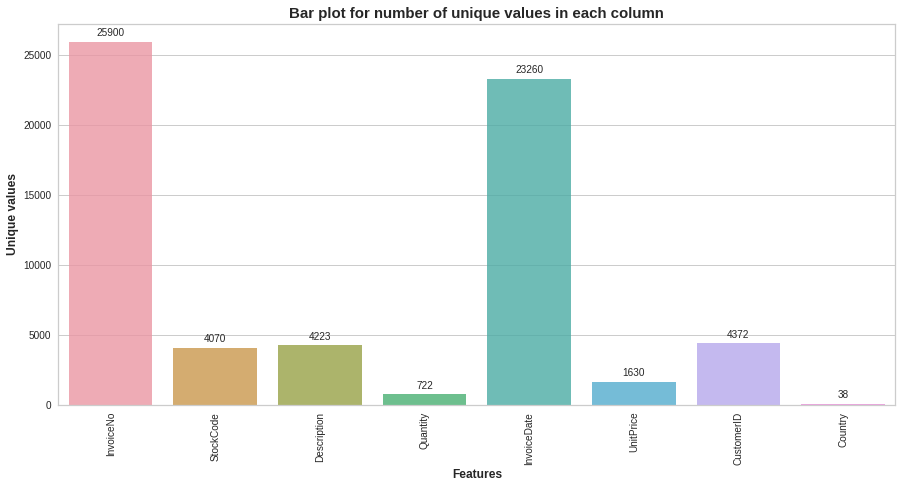

In [ ]:
#Creating bar plot for unique values of different features
unique_df=pd.DataFrame()
unique_df['Features']=df1.columns
unique=[]
for i in df1.columns:
  unique.append(df1[i].nunique())
unique_df['Uniques']=unique

f, ax = plt.subplots(1,1, figsize=(15,7))

splot = sns.barplot(x=unique_df['Features'], y=unique_df['Uniques'], alpha=0.8)
for p in splot.patches:
    splot.annotate(format(p.get_height(), '.0f'), (p.get_x() + p.get_width() / 2., p.get_height()), ha = 'center',
                   va = 'center', xytext = (0, 9), textcoords = 'offset points')
plt.title('Bar plot for number of unique values in each column',weight='bold', size=15)
plt.ylabel('Unique values', size=12, weight='bold')
plt.xlabel('Features', size=12, weight='bold')
plt.xticks(rotation=90)
plt.show()

####**2.4 Checking Nulls in CustomerID**

In [ ]:
df.isnull().sum()

InvoiceNo           0
StockCode           0
Description       592
Quantity            0
InvoiceDate         0
UnitPrice           0
CustomerID     133284
Country             0
dtype: int64

25% of critical information missing from dataset
There is a total of 133,284 rows (~25% of total data) with missing information on CustomerID. CustomerID holds the identity of the customer and without which, it will be impossible to perform customer segmentation.

**Business Context**

**(ASSUMPTION) Missing CustomerID** will be imputed with random numbers that are not existing in the dataset. Since this is an online purchase, these transactions could be made under 'Guest Checkout' which doesn't require the customer to create an account.

**(ASSUMPTION)** These transactions could likely be a one-time purchase as customers who shop frequently would probably create an account for ease of purchasing and perhaps earn rewards.
Rows with missing customerID will be dropped

**(DISCUSSION)** As discovered earlier, the corresponding purchase and cancelled transaction do not have same InvoiceNo. Though it is possible to impute CustomerID based on the unique value of InvoiceNo, there will be big inaccuracy in matching cancelled transactions. This could result in issues when the values are summed up to offset each other at a later stage

**2.5 Dropping rows containing NaN Description values**

In [ ]:
df.dropna(inplace=True)

####**2.6 StockCode as Categorical Data**

**StockCode** is a unique identifier assigned to each item and the StockCode should be a category dtype.
Given the number of items, performing One Hot Encoding might not be feasible as this might result in 'curse of dimensionality'. This column will be one-hot encoded at a later stage should the need aris.

In [ ]:
df1['StockCode'] = df1.StockCode.astype('category')

df1.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 541909 entries, 0 to 541908
Data columns (total 8 columns):
 #   Column       Non-Null Count   Dtype         
---  ------       --------------   -----         
 0   InvoiceNo    541909 non-null  object        
 1   StockCode    541909 non-null  category      
 2   Description  540455 non-null  object        
 3   Quantity     541909 non-null  int64         
 4   InvoiceDate  541909 non-null  datetime64[ns]
 5   UnitPrice    541909 non-null  float64       
 6   CustomerID   406829 non-null  float64       
 7   Country      541909 non-null  object        
dtypes: category(1), datetime64[ns](1), float64(2), int64(1), object(3)
memory usage: 30.1+ MB


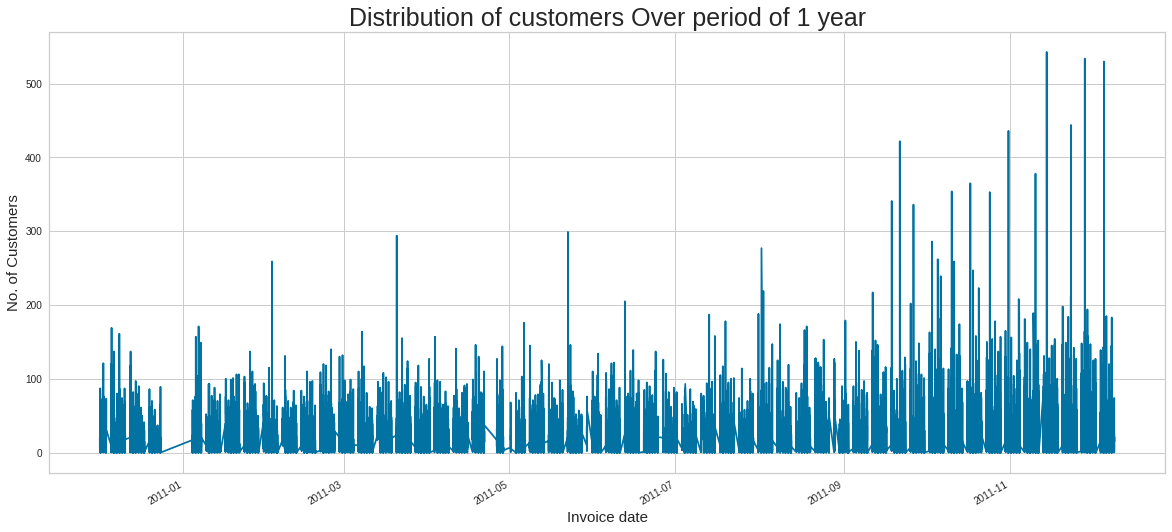

In [ ]:
## customer distribution in 1 year time period
plt.figure(figsize=(20,9))
customer_distribution = df1.groupby('InvoiceDate').count()['CustomerID'].plot()

## Set title and x, y labels
plt.title('Distribution of customers Over period of 1 year', size=25)
plt.xlabel('Invoice date', size=15)
plt.ylabel('No. of Customers', size=15)
plt.show()

####**2.7 Checking for cancelled orders**

Given in descripton

**InvoiceNo**: Invoice number. Nominal, a 6-digit integral number uniquely assigned to each transaction. If this code starts with letter 'c', it indicates a cancellation.

Let us now look at the number of canceled orders in the data.

In [ ]:
# String to be searched in start of string 
search ="C"
  
# boolean series returned with False at place of NaN
bool_series = df["InvoiceNo"].str.startswith(search, na=False)
  
# displaying filtered dataframe
cancel_order = df[bool_series]

cancel_order.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
141,C536379,D,Discount,-1,2010-12-01 09:41:00,27.50,14527.0,United Kingdom
154,C536383,35004C,SET OF 3 COLOURED FLYING DUCKS,-1,2010-12-01 09:49:00,4.65,15311.0,United Kingdom
235,C536391,22556,PLASTERS IN TIN CIRCUS PARADE,-12,2010-12-01 10:24:00,1.65,17548.0,United Kingdom
236,C536391,21984,PACK OF 12 PINK PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom
237,C536391,21983,PACK OF 12 BLUE PAISLEY TISSUES,-24,2010-12-01 10:24:00,0.29,17548.0,United Kingdom


In [ ]:
print("Shape of cancelled order", cancel_order.shape)

Shape of cancelled order (9219, 8)


In [ ]:
cancel_order_percentage = cancel_order['InvoiceNo'].count()*100/df['InvoiceNo'].count()
cancel_order_percentage

1.7336703261985624

**This shows that 9219 (approx 1.73%) were such orders which was cancelled.**

In [ ]:
cancel_order_country = cancel_order.groupby('Country')['InvoiceNo'].count().reset_index()

In [ ]:
cancel_order_country_top10 = cancel_order_country.sort_values('InvoiceNo',ascending=False, ignore_index=True).head(10)
cancel_order_country_top10

,Country,InvoiceNo
0,United Kingdom,7791
1,Germany,453
2,EIRE,300
3,France,147
4,USA,112
5,Australia,74
6,Spain,48
7,Italy,45
8,Belgium,38
9,Japan,37


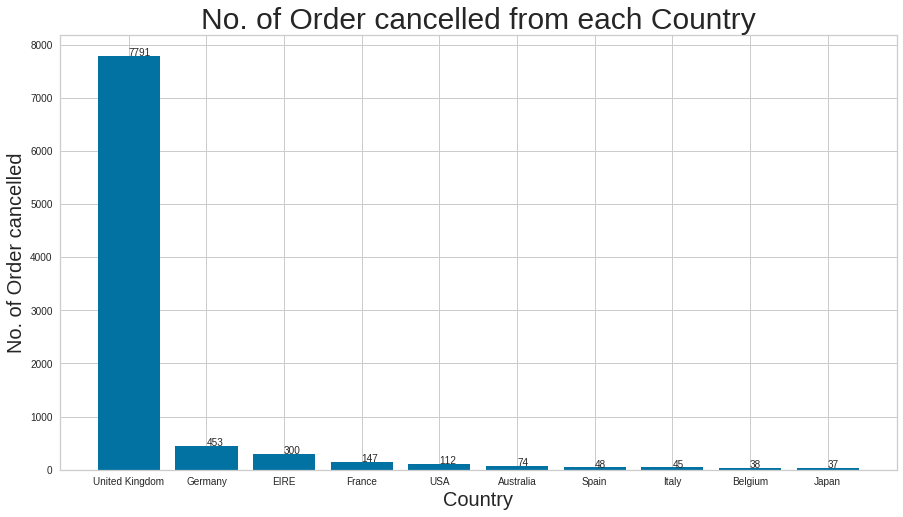

In [ ]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=cancel_order_country_top10['Country']
y=cancel_order_country_top10['InvoiceNo']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,y)

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("No. of Order cancelled", size=20)
plt.title("No. of Order cancelled from each Country", size=30)

## Showing the plot
plt.show()

In [ ]:
df = df[~df.InvoiceNo.str.contains("C", na=False)]

In [ ]:
print("After removing the cancelled data the shape of final dataset is", df.shape)

After removing the cancelled data the shape of final dataset is (522543, 8)


####**2.8. Country Count on the basis of Invoce no.**

In [ ]:
## Apply groupby function on country and Invoice No.
country_count = df.groupby('Country')['InvoiceNo'].count().reset_index()

In [ ]:
country_count.head()

,Country,InvoiceNo
0,Australia,1257
1,Austria,401
2,Bahrain,19
3,Belgium,2069
4,Brazil,32


In [ ]:
## From country_count variable finding top 10 countries
Top_ten_country = country_count.sort_values('InvoiceNo', ascending=False, ignore_index=True).head(10)
Top_ten_country

,Country,InvoiceNo
0,United Kingdom,485509
1,Germany,9465
2,France,8525
3,EIRE,8172
4,Spain,2523
5,Netherlands,2371
6,Belgium,2069
7,Switzerland,1986
8,Portugal,1502
9,Australia,1257


In [ ]:
## Adding country percentage column to top 10 countries data frame
Top_ten_country['Country_percent']= Top_ten_country['InvoiceNo']*100/df['InvoiceNo'].count()

In [ ]:
Top_ten_country

,Country,InvoiceNo,Country_percent
0,United Kingdom,485509,91.301936
1,Germany,9465,1.779932
2,France,8525,1.603161
3,EIRE,8172,1.536778
4,Spain,2523,0.474460
5,Netherlands,2371,0.445876
6,Belgium,2069,0.389084
7,Switzerland,1986,0.373475
8,Portugal,1502,0.282457
9,Australia,1257,0.236384


####**2.9. Plotting graph for top 10 countries**

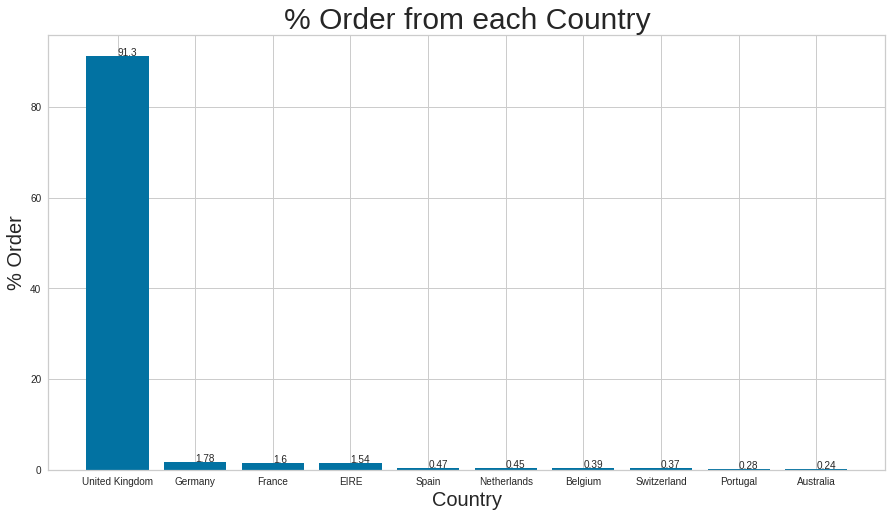

In [ ]:
# Figure Size
plt.figure(figsize=(15,8))

## Define x and y axis
x=Top_ten_country['Country']
y=Top_ten_country['Country_percent']

# creating the bar plot
plt.bar(x,y)

## Function to set label
def addlabels(x,y):
    for i in range(len(x)):
        plt.text(i,y[i],y[i])

addlabels(x,round(y,2))

# set xlabel. ylabel and title
plt.xlabel("Country", size=20)
plt.ylabel("% Order", size=20)
plt.title("% Order from each Country", size=30)

## Showing the plot
plt.show()

####**2.10. Customer's data**

In [ ]:
cs_df = df.copy()

In [ ]:
cs_df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country,amount
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom,15.30
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom,22.00
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom,20.34


In [ ]:
#fig = plt.figure(figsize=(25, 7))
PercentSales = cs_df.groupby(["CustomerID"]).amount.sum().sort_values(ascending = False).iloc[:20].reset_index()
PercentSales.head(10)

,CustomerID,amount
0,14646.0,280206.02
1,18102.0,259657.30
2,17450.0,194230.79
3,16446.0,168472.50
4,14911.0,143597.28
5,12415.0,124914.53
6,14156.0,117040.53
7,17511.0,91062.38
8,16029.0,80676.84
9,12346.0,77183.60


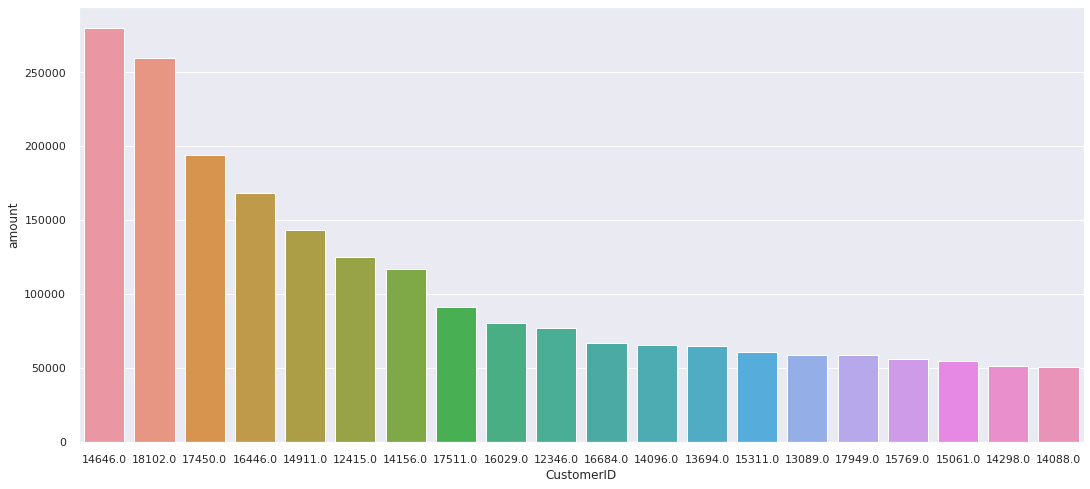

In [ ]:
sns.set(rc={'figure.figsize':(18,8)})
sns.barplot(x="CustomerID", y="amount", data=PercentSales, order=PercentSales['CustomerID'])
plt.show()

####**2.11. Top products**

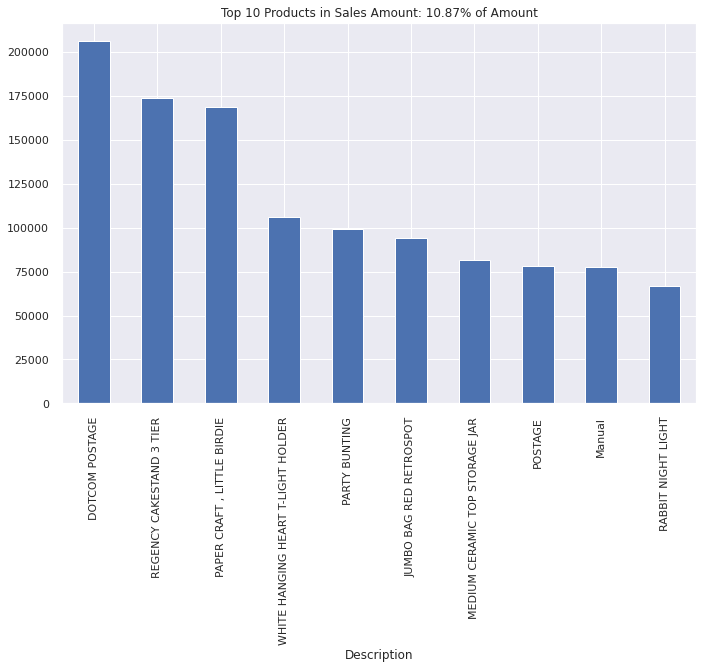

In [ ]:
AmoutSum = cs_df.groupby(["Description"]).amount.sum().sort_values(ascending = False)
inv = cs_df[["Description", "InvoiceNo"]].groupby(["Description"]).InvoiceNo.unique().\
      agg(np.size).sort_values(ascending = False)

fig = plt.figure(figsize=(25, 7))
f1 = fig.add_subplot(121)
Top10 = list(AmoutSum[:10].index)
PercentSales =  np.round((AmoutSum[Top10].sum()/AmoutSum.sum()) * 100, 2)

g = AmoutSum[Top10].\
    plot(kind='bar', title='Top 10 Products in Sales Amount: {:3.2f}% of Amount'.\
                       format(PercentSales))

**Checking orders with negative quantities that were not cancelled.**

In [ ]:
df_negative_qty = df[df['Quantity'] < 0]
df_negative_qty.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
2406,536589,21777,NaN,-10,2010-12-01 16:50:00,0.0,NaN,United Kingdom
4347,536764,84952C,NaN,-38,2010-12-02 14:42:00,0.0,NaN,United Kingdom
7188,536996,22712,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7189,536997,22028,NaN,-20,2010-12-03 15:30:00,0.0,NaN,United Kingdom
7190,536998,85067,NaN,-6,2010-12-03 15:30:00,0.0,NaN,United Kingdom


**As we can see from the above figure, these cases are the ones where CustomerID values are NaNs. These cases were also removed from the data.**

**3.12. Negative quantity denotes cancelled transaction**

It appears that negative quantity represents the cancelled transaction. However, the exact reason for the cancellation is not known.

**There are two ways to manage the cancelled orders:**

Account for both corresponding initial orders and cancelled orders to remove sales from the dataset, since there is no actual profit made from the cancelled orders

Drop only the cancelled orders to maximise customers' data, though it will also capture the wrong purchase made by customers.

**(DISCUSSION)**

The first approach will reflect the actual purchase made, as cancelled orders could represent wrong order by customers and this doesn't reflect the actual customer's purchase intent. The value of corresponding purchases and the cancelled transaction will be aggregated and hence the rows value will offset each other naturally.

In [ ]:
df_negative_qty.shape

(1336, 8)


**So, there is 1336 rows having negative quantity and also order were not canceled.**

**Also we see that, these cases are the ones where CustomerID values are NaNs. These cases were also removed from the data.**

In [ ]:
df = df[df['Quantity'] > 0]

In [ ]:
df.head()

,InvoiceNo,StockCode,Description,Quantity,InvoiceDate,UnitPrice,CustomerID,Country
0,536365,85123A,WHITE HANGING HEART T-LIGHT HOLDER,6,2010-12-01 08:26:00,2.55,17850.0,United Kingdom
1,536365,71053,WHITE METAL LANTERN,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
2,536365,84406B,CREAM CUPID HEARTS COAT HANGER,8,2010-12-01 08:26:00,2.75,17850.0,United Kingdom
3,536365,84029G,KNITTED UNION FLAG HOT WATER BOTTLE,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom
4,536365,84029E,RED WOOLLY HOTTIE WHITE HEART.,6,2010-12-01 08:26:00,3.39,17850.0,United Kingdom


##**3. Feature Engineering - Building features for RFM model:**

**Recency, Frequency, and Monetary (RFM) Segmentation**

RFM is a behavioural customer segmentation for measuring customer value.

**Receny:** How recent was each customer's last purchase

**Frequency:** How many times the customer purchased in the last 12 months

**Monetary** Value: How much has the customer spent in the last 12 months

**Recency**

* To create a Recency feature variable, we need to decide the reference date for analysis and we wil define the reference date as one day before the last transaction.

* We fix a reference date for finding the recent transactions. The reference date would be a day after the most recent transaction date in the dataset. Then we calculate the days difference between the most recent transaction carried out by the customer and this reference date

In [ ]:
reference_date = df.InvoiceDate.max()

#timedelta function returns to total number of seconds
reference_date = reference_date + datetime.timedelta(days=1)

print(df.InvoiceDate.max(), df.InvoiceDate.min())
reference_date

2011-12-09 12:50:00 2010-12-01 08:26:00


Timestamp('2011-12-10 12:50:00')

We will construct a reference variable as number of days before the reference date when a customer last made a purchase.

In [ ]:
df['days_since_last_purchase'] = reference_date- df.InvoiceDate
df['days_since_last_purchase_num'] = df['days_since_last_purchase'].astype('timedelta64[D]')
df['days_since_last_purchase_num'].head() 

0    374.0
1    374.0
2    374.0
3    374.0
4    374.0
Name: days_since_last_purchase_num, dtype: float64

In [ ]:
customer_history_df = df.groupby('CustomerID')['days_since_last_purchase_num'].min().reset_index()
customer_history_df.rename(columns={'days_since_last_purchase_num':'Recency'}, inplace=True)
customer_history_df.head()

,CustomerID,Recency
0,12346.0,326.0
1,12347.0,2.0
2,12348.0,75.0
3,12349.0,19.0
4,12350.0,310.0


In [ ]:
customer_history_df.describe()

,CustomerID,Recency
count,4339.000000,4339.000000
mean,15299.936852,92.518322
std,1721.889758,100.009747
min,12346.000000,1.000000
25%,13812.500000,18.000000
50%,15299.000000,51.000000
75%,16778.500000,142.000000
max,18287.000000,374.000000


####**3.1. Monetary value**

In [ ]:
df['Monetary'] = df['Quantity']*df['UnitPrice']

In [ ]:
customer_monetary_val = df[['CustomerID','Monetary']].groupby('CustomerID').sum().reset_index()
customer_monetary_val.head()

,CustomerID,Monetary
0,12346.0,77183.60
1,12347.0,4310.00
2,12348.0,1797.24
3,12349.0,1757.55
4,12350.0,334.40


In [ ]:
customer_history_df=customer_history_df.merge(customer_monetary_val,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary
0,12346.0,326.0,77183.60
1,12347.0,2.0,4310.00
2,12348.0,75.0,1797.24
3,12349.0,19.0,1757.55
4,12350.0,310.0,334.40


####**3.2. Frequency**

Calculate the frequency of transactions for each customer

In [ ]:
customer_freq = df[['CustomerID','Monetary']].groupby('CustomerID').count().reset_index()
customer_freq.rename(columns={'Monetary':'Frequency'},inplace=True)
customer_freq.head()

,CustomerID,Frequency
0,12346.0,1
1,12347.0,182
2,12348.0,31
3,12349.0,73
4,12350.0,17


In [ ]:
customer_history_df=customer_history_df.merge(customer_freq,how='outer')
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency
0,12346.0,326.0,77183.60,1
1,12347.0,2.0,4310.00,182
2,12348.0,75.0,1797.24,31
3,12349.0,19.0,1757.55,73
4,12350.0,310.0,334.40,17


##**4. Reducing Skewness**

In [ ]:
def check_skew(df, column):
    skew = stat.skew(df[column])
    skewtest = stat.skewtest(df[column])
    plt.title('Distribution of ' + column)
    sns.distplot(df[column])
    print("{}'s: Skew: {}, : {}".format(column, skew, skewtest))
    return 

####**4.1 Finding Skewness**

Recency's: Skew: 1.2459259732239887, : SkewtestResult(statistic=26.614420985448668, pvalue=4.6224317516580606e-156)
Frequency's: Skew: 17.988762095343063, : SkewtestResult(statistic=83.43430129337605, pvalue=0.0)
Monetary's: Skew: 19.347358463913086, : SkewtestResult(statistic=85.03831989385715, pvalue=0.0)


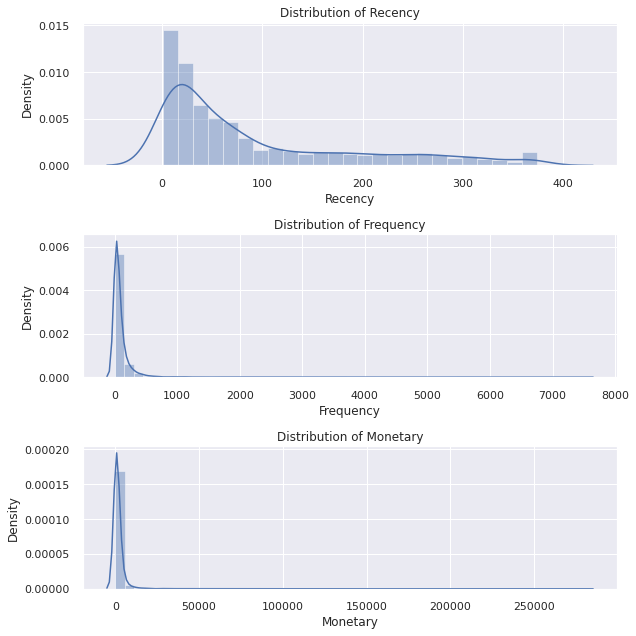

In [ ]:
# Plot all 3 graphs together for summary findings
plt.figure(figsize=(9, 9))

plt.subplot(3, 1, 1)
check_skew(customer_history_df,'Recency')

plt.subplot(3, 1, 2)
check_skew(customer_history_df,'Frequency')

plt.subplot(3, 1, 3)
check_skew(customer_history_df,'Monetary')

plt.tight_layout()
plt.savefig('before_transform.png', format='png', dpi=1000)

In [ ]:
customer_history_df.describe()

,CustomerID,Recency,Monetary,Frequency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,2043.043801,89.403780
std,1721.889758,100.009747,8980.546779,222.574844
min,12346.000000,1.000000,0.000000,1.000000
25%,13812.500000,18.000000,305.190000,17.000000
50%,15299.000000,51.000000,664.000000,40.000000
75%,16778.500000,142.000000,1650.265000,97.000000
max,18287.000000,374.000000,280206.020000,7523.000000


In [ ]:
# Copy original to new df
df_rfm_log = customer_history_df.copy()

# Data Pre-Processing for Negative Value
df_rfm_log['Monetary'] = (df_rfm_log['Monetary'] - df_rfm_log['Monetary'].min()) + 1

df_rfm_log.describe()

,CustomerID,Recency,Monetary,Frequency
count,4339.000000,4339.000000,4339.000000,4339.000000
mean,15299.936852,92.518322,2044.043801,89.403780
std,1721.889758,100.009747,8980.546779,222.574844
min,12346.000000,1.000000,1.000000,1.000000
25%,13812.500000,18.000000,306.190000,17.000000
50%,15299.000000,51.000000,665.000000,40.000000
75%,16778.500000,142.000000,1651.265000,97.000000
max,18287.000000,374.000000,280207.020000,7523.000000


####**4.2. Removing skewness**

Frequency's: Skew: -0.21819513699475254, : SkewtestResult(statistic=-5.8102890610237745, pvalue=6.23650667479091e-09)
Monetary's: Skew: 0.36579012799549065, : SkewtestResult(statistic=9.55213901523594, pvalue=1.2704562846486915e-21)


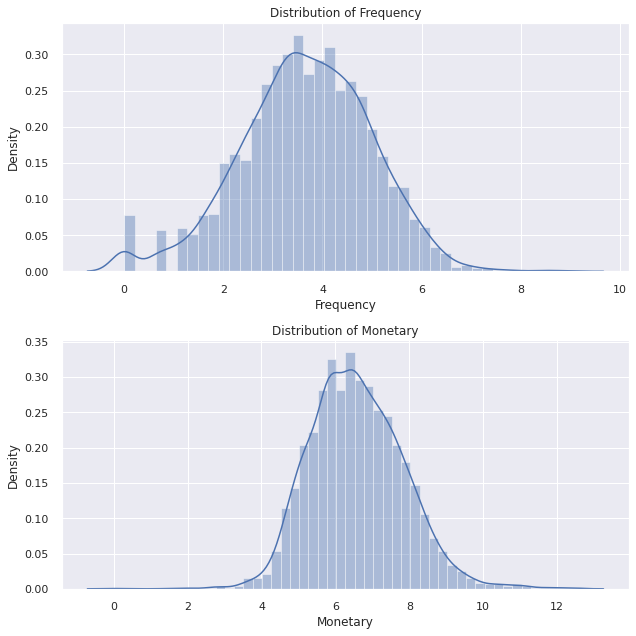

In [ ]:
# Transform skewed data with log tranasformation
df_rfm_log = np.log(df_rfm_log)

# Check for skewness after log transformation
plt.figure(figsize=(9, 9))

# plt.subplot(3, 1, 1)
# check_skew(df_rfm_log,'Recency')

plt.subplot(2, 1, 1)
check_skew(df_rfm_log,'Frequency')

plt.subplot(2, 1, 2)
check_skew(df_rfm_log,'Monetary')

plt.tight_layout()
plt.savefig('after_transform.png', format='png', dpi=1000)

##**5. Outlier Treatment**


####**5.1 Finding Outliers**

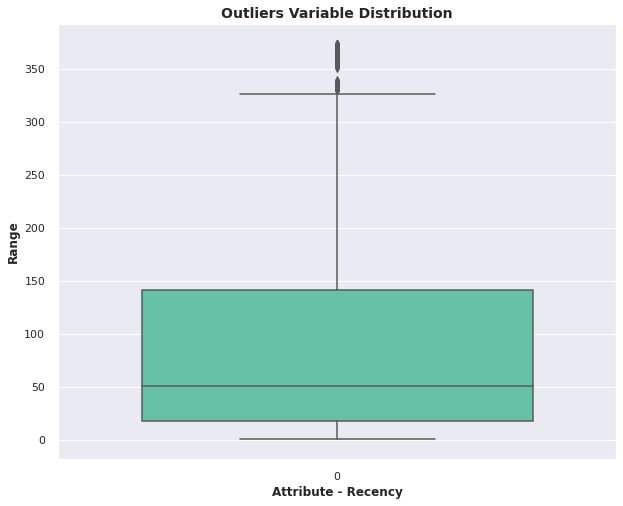

In [ ]:
# Box plot of Recency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = customer_history_df['Recency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Recency", fontweight = 'bold')
plt.show()

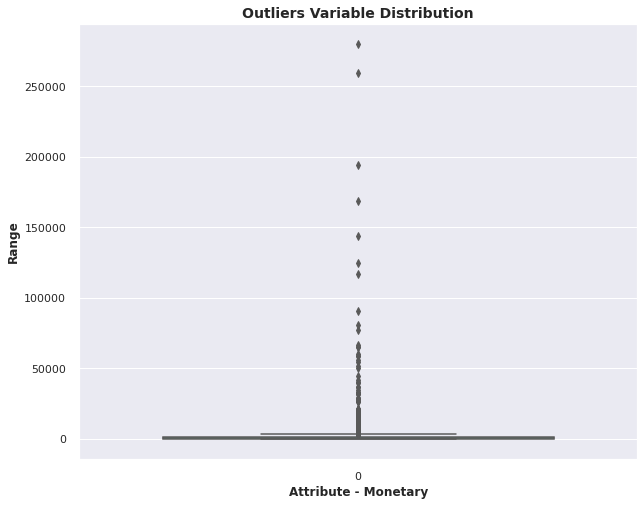

In [ ]:
# Box plot of Monetary
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = customer_history_df['Monetary'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Monetary", fontweight = 'bold')
plt.show()

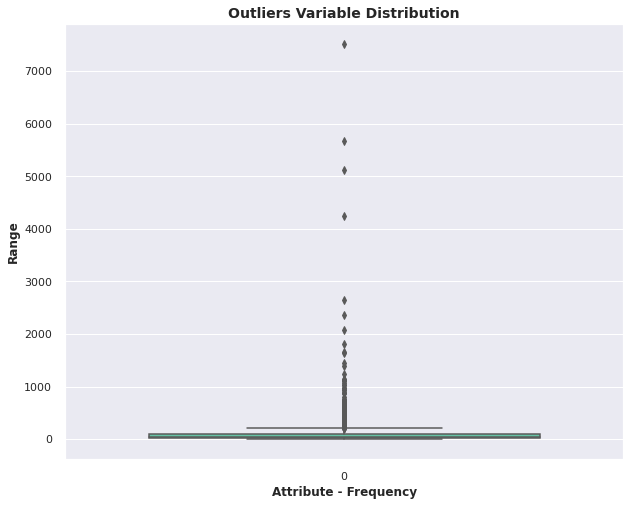

In [ ]:
# Box plot of Frequency
plt.rcParams['figure.figsize'] = [10,8]
sns.boxplot(data = customer_history_df['Frequency'], orient="v", palette="Set2" ,whis=1.5,saturation=1, width=0.7)
plt.title("Outliers Variable Distribution", fontsize = 14, fontweight = 'bold')
plt.ylabel("Range", fontweight = 'bold')
plt.xlabel("Attribute - Frequency", fontweight = 'bold')
plt.show()

####**5.2. Treating Outliers**

In [ ]:
# removing (statistical) outliers
Q1 = customer_history_df.Monetary.quantile(0.05)
Q3 = customer_history_df.Monetary.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Monetary >= Q1 - 1.5*IQR) & (customer_history_df.Monetary <= Q3 + 1.5*IQR)]

# outlier treatment for recency
Q1 = customer_history_df.Recency.quantile(0.05)
Q3 = customer_history_df.Recency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Recency >= Q1 - 1.5*IQR) & (customer_history_df.Recency <= Q3 + 1.5*IQR)]

# outlier treatment for frequency
Q1 = customer_history_df.Frequency.quantile(0.05)
Q3 = customer_history_df.Frequency.quantile(0.95)
IQR = Q3 - Q1
customer_history_df = customer_history_df[(customer_history_df.Frequency >= Q1 - 1.5*IQR) & (customer_history_df.Frequency <= Q3 + 1.5*IQR)]

##**6. Feature Scaling:**


* Since, all the features like Recency, Frequency and Monetary value are within varying ranges of values, we need to standardize them.
* In addition, the feature like "Monetary value" can take a very large range of values. 
*So, to standardize all the inputs features, we apply log transform, so that the input to our clustering algorithm is a set of well scaled and transformed features.

In [ ]:
# Rescaling
rfm_df = customer_history_df[['Monetary', 'Frequency', 'Recency']]

# instantiate
scaler = StandardScaler()

# fit_transform
rfm_df_scaled = scaler.fit_transform(rfm_df)
rfm_df_scaled.shape

(4257, 3)

In [ ]:
rfm_df_scaled = pd.DataFrame(rfm_df_scaled)
rfm_df_scaled.columns = ['Monetary', 'Frequency', 'Recency']
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.665170,1.109892,-0.917855
1,0.270188,-0.453709,-0.189261
2,0.248154,-0.018800,-0.748182
3,-0.541921,-0.598679,2.156212
4,0.663685,0.105459,-0.578510


###**6.1. Visualizing the relationship between R, F and M:**

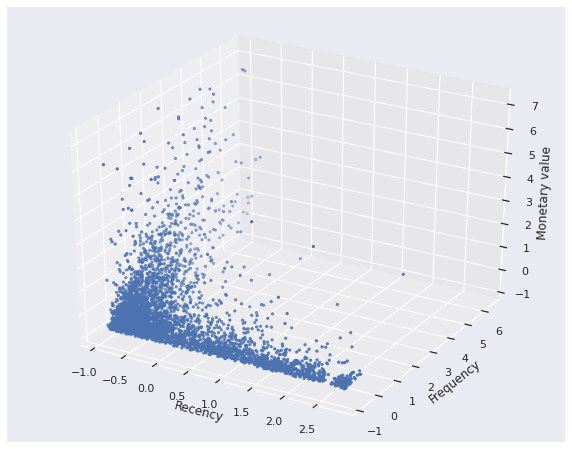

In [ ]:
# Importing Library for 3D plot
from mpl_toolkits.mplot3d import Axes3D

# set fig size
fig=plt.figure(figsize=(10,8))

# syntax for 3-D plotting
ax=fig.add_subplot(111,projection='3d')

# syntax for plotting
xs = rfm_df_scaled.Recency
ys = rfm_df_scaled.Frequency
zs = rfm_df_scaled.Monetary
ax.scatter(xs,ys,zs,s=5)

# set x, y & z label
ax.set_xlabel('Recency')
ax.set_ylabel('Frequency')
ax.set_zlabel('Monetary value')

# show the plot
plt.show()

**Observations:**
* Customers who recently bought items, are also the ones who buy more freqently and place high value orders
* Customers who transacted long time ago, also place lower valued orders
* Customers who buy occasionally, do not tend to buy expensive items

##**7. Customer segmentation through clustering:**

##**7.1 Modelling**
**Silhouette analysis on K-Means Clustering**

**Silhouette analysis** can be used to study the separation distance between the resulting clusters, as a strategy to quantifying the quality of clustering via graphical tool to plot a measure of how tightly grouped the samples in the clusters are. The silhouette plot displays a measure of how close each point in one cluster is to points in the neighboring clusters and thus provides a way to assess parameters like number of clusters visually.

* Let's see below how our data perform for each K clusters groups (3, 5 and 7) in the silhouette score of each cluster, along with the center of each of the cluster discovered in the scatter plots, by amount_log vs recency_log and vs frequency_log.

* Silhouette Analysis

* silhouette score = 

p is the mean distance to the points in the nearest cluster that the data point is not a part of

q is the mean intra-cluster distance to all the points in its own cluster.

**The value of the silhouette score range lies between -1 to 1.**

* A score closer to 1 indicates that the data point is very similar to other data points in the cluster,

* A score closer to -1 indicates that the data point is not similar to the data points in its cluster.

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0225aaf6d0>,
                     estimator=KMeans(n_clusters=3))

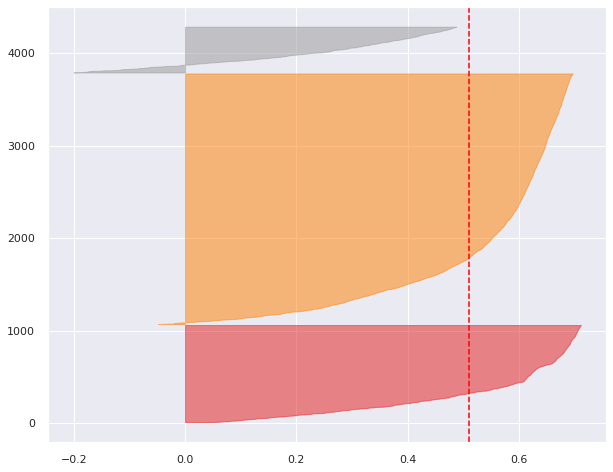

In [ ]:
model = SilhouetteVisualizer(KMeans(3))
model.fit(rfm_df_scaled)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f022d3be4d0>,
                     estimator=KMeans(n_clusters=4))

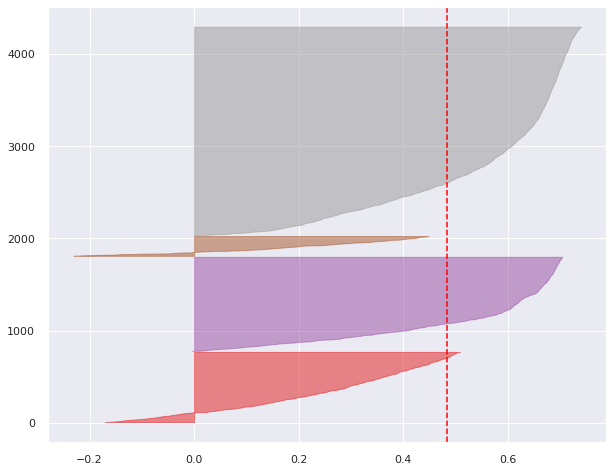

In [ ]:
model = SilhouetteVisualizer(KMeans(4))
model.fit(rfm_df_scaled)

SilhouetteVisualizer(ax=<matplotlib.axes._subplots.AxesSubplot object at 0x7f0226242bd0>,
                     estimator=KMeans(n_clusters=5))

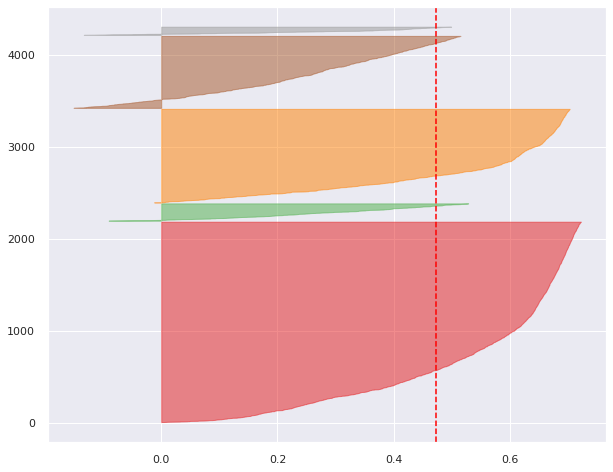

In [ ]:
model = SilhouetteVisualizer(KMeans(5))
model.fit(rfm_df_scaled)


###**7.2 Finding best value for k**
###**The Elbow Method**

Using the elbow method to find the optimal number of clusters. The idea behind the elbow method is to identify the value of k where the distortion begins to increase most rapidly. If k increases, the distortion will decrease, because the samples will be closer to the centroids they are assigned to.

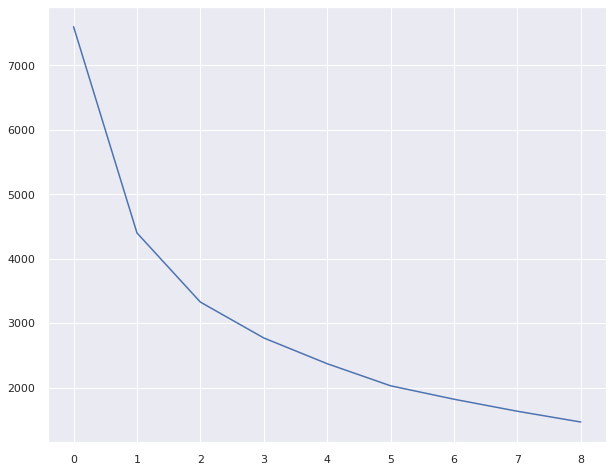

In [ ]:
# elbow-curve/SSD
ssd = []
range_n_clusters = range(2,11)
for num_clusters in range_n_clusters:
    kmeans = KMeans(n_clusters=num_clusters)
    kmeans.fit(rfm_df_scaled)
    
    ssd.append(kmeans.inertia_)
    
# plot the SSDs for each n_clusters
# ssd
plt.plot(ssd)
plt.show()

In [ ]:
# silhouette analysis
range_n_clusters = [2, 3, 4, 5, 6, 7, 8]

for num_clusters in range_n_clusters:
    
    # intialise kmeans
    kmeans = KMeans(n_clusters=num_clusters, max_iter=50)
    kmeans.fit(rfm_df_scaled)
    
    cluster_labels = kmeans.labels_
    
    # silhouette score
    silhouette_avg = silhouette_score(rfm_df_scaled, cluster_labels)
    print("For n_clusters={0}, the silhouette score is {1}".format(num_clusters, silhouette_avg))

For n_clusters=2, the silhouette score is 0.5453967714022041
For n_clusters=3, the silhouette score is 0.5102534913202551
For n_clusters=4, the silhouette score is 0.4818781564583257
For n_clusters=5, the silhouette score is 0.46981094434641796
For n_clusters=6, the silhouette score is 0.41789185800899464
For n_clusters=7, the silhouette score is 0.4157485233725426
For n_clusters=8, the silhouette score is 0.4119015619390884


In [ ]:
# final model with k=3
kmeans = KMeans(n_clusters=3, max_iter=50)
kmeans.fit(rfm_df_scaled)

KMeans(max_iter=50, n_clusters=3)

In [ ]:
kmeans.labels_

array([0, 1, 1, ..., 1, 0, 1], dtype=int32)

In [ ]:
# assign the label
customer_history_df['cluster_id'] = kmeans.labels_
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id
1,12347.0,2.0,4310.00,182,0
2,12348.0,75.0,1797.24,31,1
3,12349.0,19.0,1757.55,73,1
4,12350.0,310.0,334.40,17,2
5,12352.0,36.0,2506.04,85,1


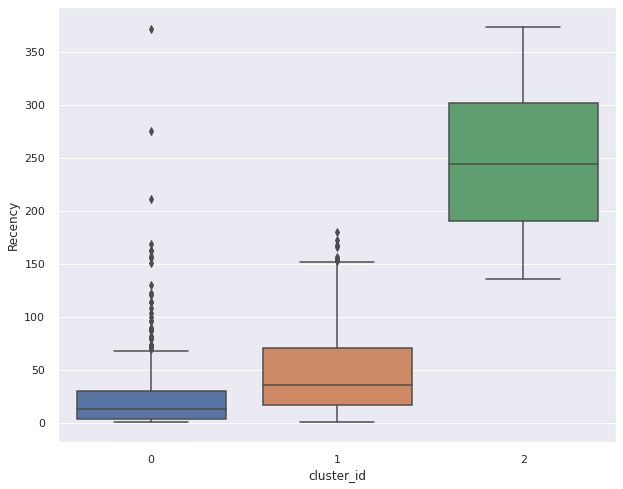

In [ ]:
# plot
sns.boxplot(x='cluster_id', y='Recency', data=customer_history_df)
plt.show()

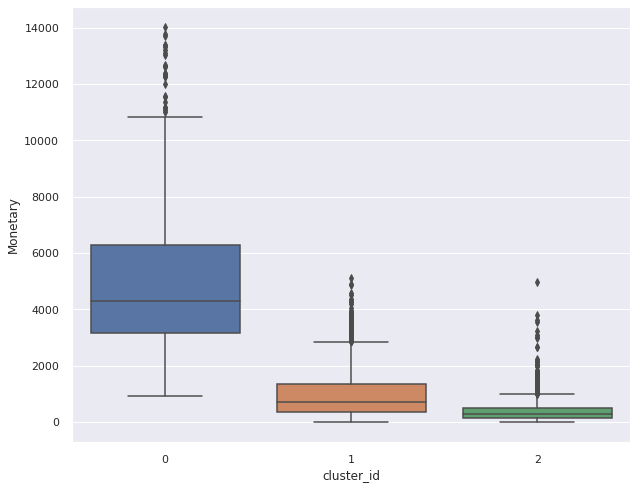

In [ ]:
# plot
sns.boxplot(x='cluster_id', y='Monetary', data=customer_history_df)
plt.show()

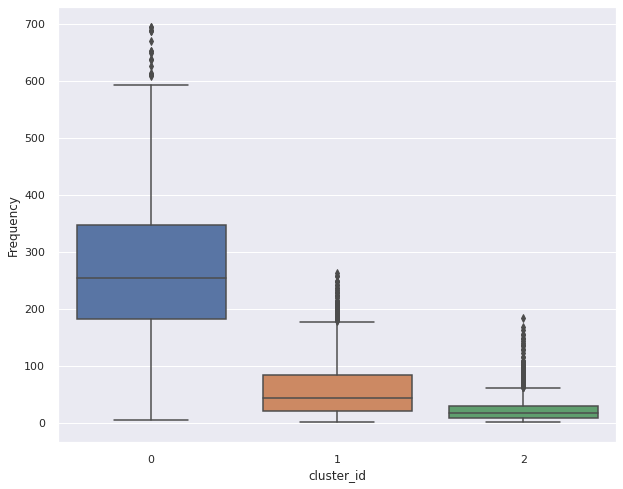

In [ ]:
# plot
sns.boxplot(x='cluster_id', y='Frequency', data=customer_history_df)
plt.show()

##**7.3 Hierarchical Clustering**

Hierarchical clustering involves creating clusters that have a predetermined ordering from top to bottom. For example, all files and folders on the hard disk are organized in a hierarchy. There are two types of hierarchical clustering,

* Divisive
* Agglomerative

In [ ]:
rfm_df_scaled.head()

,Monetary,Frequency,Recency
0,1.665170,1.109892,-0.917855
1,0.270188,-0.453709,-0.189261
2,0.248154,-0.018800,-0.748182
3,-0.541921,-0.598679,2.156212
4,0.663685,0.105459,-0.578510


In [ ]:
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id
1,12347.0,2.0,4310.00,182,0
2,12348.0,75.0,1797.24,31,1
3,12349.0,19.0,1757.55,73,1
4,12350.0,310.0,334.40,17,2
5,12352.0,36.0,2506.04,85,1


####**7.3.1 Single Linkage:**
In single linkage hierarchical clustering, the distance between two clusters is defined as the shortest distance between two points in each cluster. For example, the distance between clusters “r” and “s” to the left is equal to the length of the arrow between their two closest points.

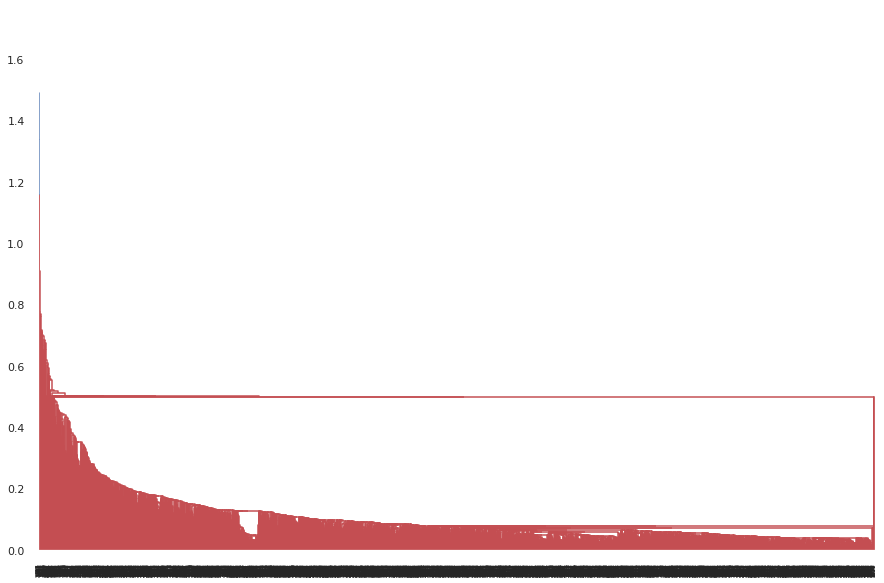

In [ ]:
# single linkage
plt.figure(figsize=(15,10))
mergings = linkage(rfm_df_scaled, method="single", metric='euclidean')
dendrogram(mergings)
plt.show()

####**7.3.2 Average Linkage:**
In average linkage hierarchical clustering, the distance between two clusters is defined as the average distance between each point in one cluster to every point in the other cluster. For example, the distance between clusters “r” and “s” to the left is equal to the average length each arrow between connecting the points of one cluster to the other.

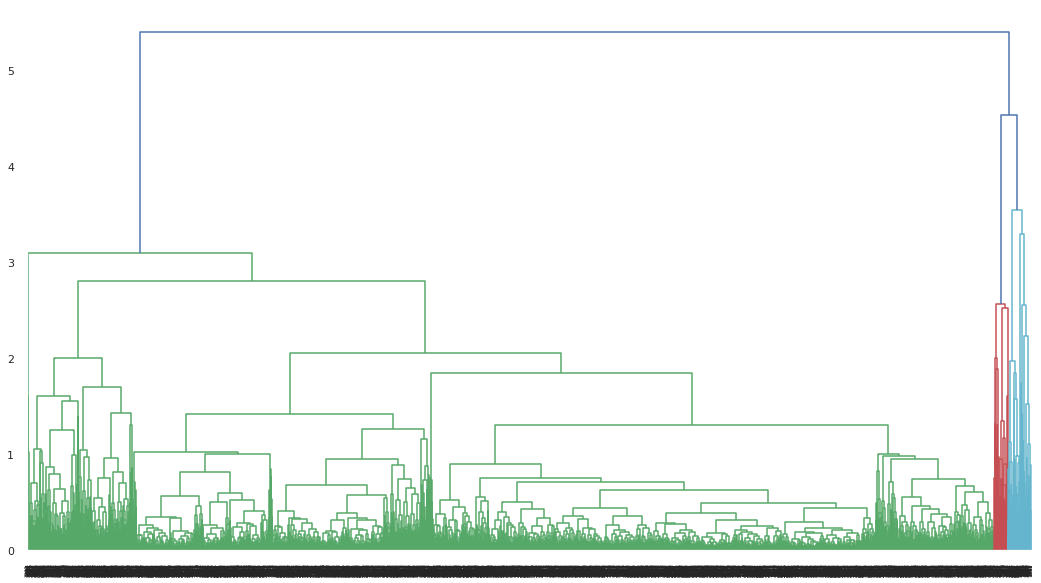

In [ ]:
# Average linkage
plt.figure(figsize=(18,10))
mergings = linkage(rfm_df_scaled, method="average", metric='euclidean')
dendrogram(mergings)
plt.show()

####**7.3.3 Complete-linkage clustering:**

Complete-linkage clustering is one of several methods of agglomerative hierarchical clustering. At the beginning of the process, each element is in a cluster of its own. The clusters are then sequentially combined into larger clusters until all elements end up being in the same cluster. The method is also known as farthest neighbour clustering. The result of the clustering can be visualized as a dendrogram, which shows the sequence of cluster fusion and the distance at which each fusion took place.

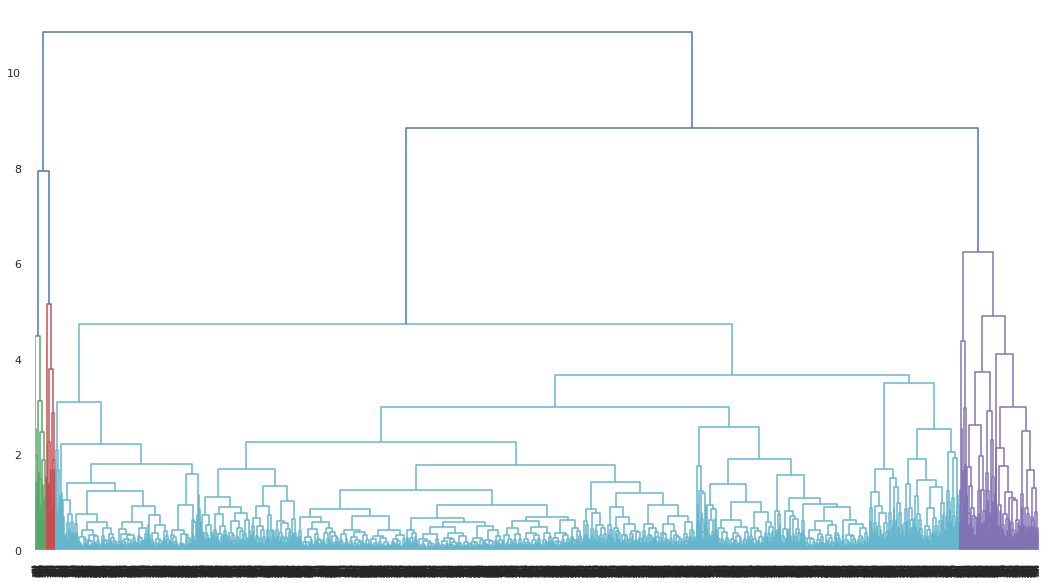

In [ ]:
# complete linkage
plt.figure(figsize=(18,10))
mergings = linkage(rfm_df_scaled, method="complete", metric='euclidean')
dendrogram(mergings)
plt.show()

In [ ]:
# 3 clusters
cluster_labels = cut_tree(mergings, n_clusters=3).reshape(-1, )
cluster_labels

array([0, 0, 0, ..., 0, 2, 0])

In [ ]:
# assign cluster labels
customer_history_df['cluster_labels'] = cluster_labels
customer_history_df.head()

,CustomerID,Recency,Monetary,Frequency,cluster_id,cluster_labels
1,12347.0,2.0,4310.00,182,0,0
2,12348.0,75.0,1797.24,31,1,0
3,12349.0,19.0,1757.55,73,1,0
4,12350.0,310.0,334.40,17,2,0
5,12352.0,36.0,2506.04,85,1,0


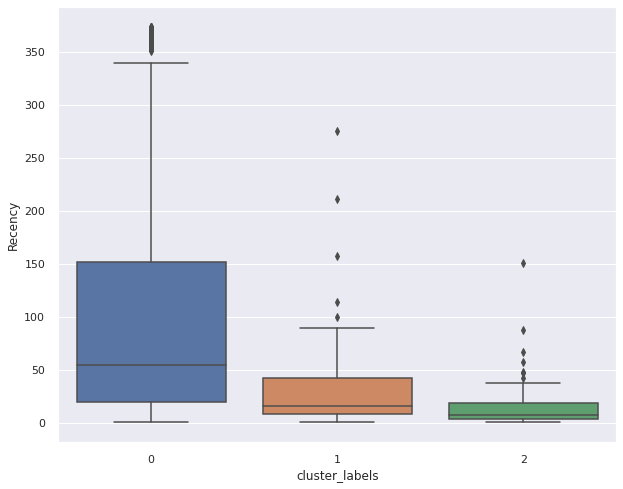

In [ ]:
# plots
sns.boxplot(x='cluster_labels', y='Recency', data=customer_history_df)

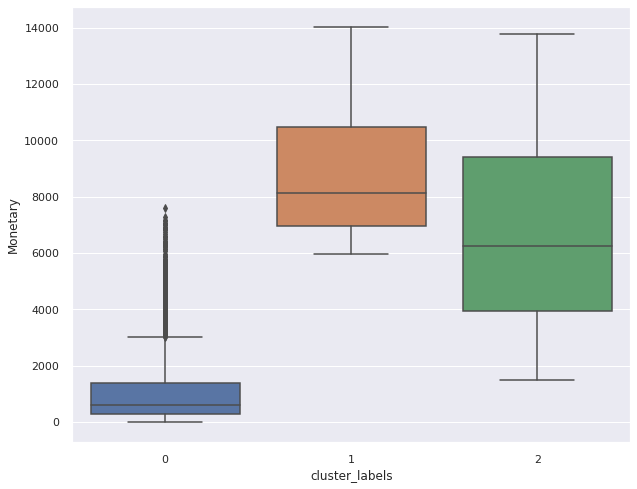

In [ ]:
# plots
sns.boxplot(x='cluster_labels', y='Monetary', data=customer_history_df)

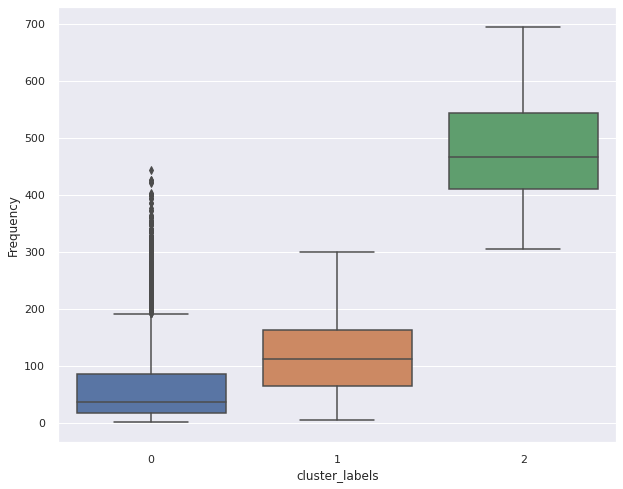

In [ ]:
# plots
sns.boxplot(x='cluster_labels', y='Frequency', data=customer_history_df)

In [ ]:
### visualize the result
import plotly.express as px
fig = px.scatter_3d(customer_history_df, x='Recency', y='Frequency', z='Monetary',
              color='cluster_labels')
fig.show()

###**7.3.4. Summary**

* RFM analysis can segment customers into homogenous group quickly with set of minimum variables. 
* Scoring system can be defined and ranged differently. We get a better result for clustering steps by applying scoring rather than using the raw calculated RFM values. 
* Therefore, segmenting should be done by RFM scoring and further analysis on the spending behavior should be done on the raw values for the targeted cluster to expose more insight and characteristics.
* RFM analysis solely depends on purchasing behavior and histories, analysis can be further improved by exploring weighted composite scoring or including customer demographic information and product information. 
* A good analysis can increase effectiveness and efficiency of marketing plans, hence increase profitability at minimum cost

##**8. Final Analysis**

####**Inference:**
**K-Means Clustering with 3 Cluster Ids**

* Customers with Cluster Id 1 are the customers with high amount of transactions as compared to other customers.
* Customers with Cluster Id 1 are frequent buyers.
* Customers with Cluster Id 2 are not recent buyers and hence least of importance from business point of view.

**Hierarchical Clustering with 3 Cluster Labels**

* Customers with Cluster_Labels 2 are the customers with high amount of transactions as compared to other customers.
* Customers with Cluster_Labels 2 are frequent buyers.
* Customers with Cluster_Labels 0 are not recent buyers and hence least of importance from business point of view.

####**8.1 Observations and Inferences:**
**1. Three Clusters (Customer Segments):**

Carefully examining the three cluster classification, we observe following groups of customers:

**High value customer:**

'Cluster 2' is the high value customer segment for the online retails store as the customers in this group place the highest value orders with a very high relative frequency than other members. They are also the ones who have transacted the most recently.

**Medium value customer:**

'Cluster 0' appears to be the medium valued customer segment. These customers place an order of a considerable amount, though not as much as high valued customers, but still quite higher than low valued customers. Also, their orders are relatively more frequent than the lowest value segment.

**Low value customer:**

It is quite evident that 'Cluster 1' has customers who rarely shop and when they order, their orders are pretty low valued. Apart from the numbers, the visualization of clusters in Silhoutte Analysis show that all three customer segments are quite distinct with very less overlapp between them. The general trend resonated in these 3 clusters is that high monetary value is correlated with high frequency of orders and more recent ones.

**2. Five Clusters (Customer Segments):**

In five clusters, we find the following customer segments:

**Overall high valued customers:**

'Cluster 0' is the typical high value customer who has shopped recently and shops regularly for high value orders.

**High monetary value but less frequent:**

'Cluster 1' represents a peculiar customer segment who place quite a high valued order but do not do so frequently or have not done much recently. But, these customers do hold a lot of promise if targeted to improve sales.

**Medium value - low frequency - recent customers:**

The customers from 'Cluster 4' have recently placed medium valued orders but do not do so frequently.

**Medium value - low frequency - older customers:**

The customers from 'Cluster 3' happen to place medium valued orders quite a long time ago and they do not do so frequently.

**Low valued customers:**

'Cluster 2' is the segment of customers who have not shopped in the longest time, nor do they shop frequently and their orders are of the lowest values.
The visualization of clusters in Silhoutte Analysis show some overlapp between the customer segments.

However, the dataset does not distinguish between wholesale and retail customers, it is quite likely that high value frequent clients are the wholesale dealers and medium/ low valued ones are individual retail purchasers.

####**8.2 Conclusion:**
The customer segments thus deduced can be very useful in targeted marketing, scouting for new customers and ultimately revenue growth. After knowing the types of customers, it depends upon the retailer policy whether to chase the high value customers and offer them better service and discounts or try and encourage low/ medium value customers to shop more freqently or of higher monetary values.